In [39]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [40]:
train_data = datasets.MNIST(
    root = 'data', 
    train=True,
    transform = ToTensor(),
    download = True
)

In [41]:
test_data = datasets.MNIST(
    root = 'data', 
    train=False,
    transform = ToTensor(),
    download = True
)

In [42]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [43]:
train_data.targets.shape

torch.Size([60000])

In [44]:
from torch.utils.data import DataLoader


loaders = {
    'train': DataLoader(
        train_data, 
        batch_size=100,
        shuffle=True,
        num_workers=1
    ),

    'test': DataLoader(
        test_data, 
        batch_size=100,
        shuffle=True,
        num_workers=1
    )
}

In [45]:
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim

In [53]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv_dropout = nn.Dropout2d()
        self.fcl1 = nn.Linear(320, 50)
        self.fcl2 = nn.Linear(50, 10)
    
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv_dropout(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fcl1(x))
        x = F.dropout(x, training=self.training)
        x = self.fcl2(x)
        return F.softmax(x)
        

In [60]:
import torch 


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()    # backpropogate 
        optimizer.step()

        if batch_idx % 30 == 0:
            print(f"Training Epoch {epoch}, [{batch_idx*len(data)}], loss: {loss.item()}")


def test():
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

        test_loss /= len(loaders['test'].dataset)
        print(f"loss: {test_loss:.4f}, accuracy: {correct / len(loaders['test'].dataset)}")



In [61]:


for epoch in range(1, 11):
    train(epoch)
    test()

/tmp/ipykernel_6954/3403551844.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Training Epoch 1, [0], loss: 2.3031809329986572
Training Epoch 1, [3000], loss: 2.273954391479492
Training Epoch 1, [6000], loss: 2.086544990539551
Training Epoch 1, [9000], loss: 1.983683466911316
Training Epoch 1, [12000], loss: 1.8659390211105347
Training Epoch 1, [15000], loss: 1.736417293548584
Training Epoch 1, [18000], loss: 1.7683725357055664
Training Epoch 1, [21000], loss: 1.7813929319381714
Training Epoch 1, [24000], loss: 1.766577124595642
Training Epoch 1, [27000], loss: 1.6924138069152832
Training Epoch 1, [30000], loss: 1.6788954734802246
Training Epoch 1, [33000], loss: 1.6786775588989258
Training Epoch 1, [36000], loss: 1.579246997833252
Training Epoch 1, [39000], loss: 1.6465226411819458
Training Epoch 1, [42000], loss: 1.6050480604171753
Training Epoch 1, [45000], loss: 1.6020535230636597
Training Epoch 1, [48000], loss: 1.6059969663619995
Training Epoch 1, [51000], loss: 1.7357254028320312
Training Epoch 1, [54000], loss: 1.6195825338363647
Training Epoch 1, [57000]

prediction 4


/tmp/ipykernel_6954/3403551844.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


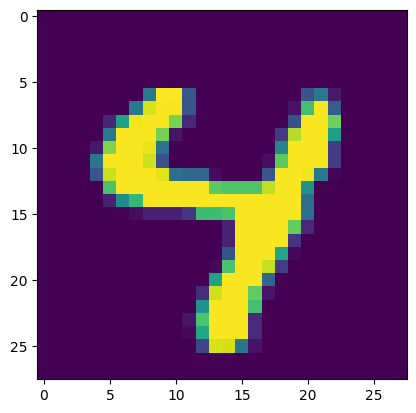

In [93]:
import matplotlib.pyplot as plt 

model.eval()

data, target = test_data[1010]
data = data.unsqueeze(0).to(device)

output = model(data.to(device))

prediction = output.argmax(dim=1, keepdim=True)
print(f"prediction {prediction.item()}")

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image)
plt.show()
